In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [5]:
!wget $data

--2024-10-09 17:32:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.1s    

2024-10-09 17:32:05 (2.96 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [7]:
df = pd.read_csv('laptops.csv')

In [9]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [11]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [12]:
df_subset = df[['ram', 'storage', 'screen', 'final_price']]
df_subset

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

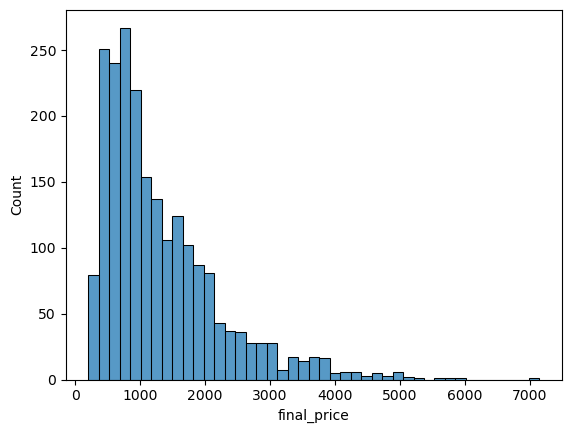

In [13]:
sns.histplot(df.final_price)

In [14]:
df_subset.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [16]:
df_subset.ram.median()

16.0

In [18]:
for col in df_subset.columns:
    print(col)
    print(df_subset[col].unique()[:5])
    print(df_subset[col].nunique())
    print()

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

screen
[15.6 17.3 14.  16.1 13.3]
29

final_price
[1009.    299.    789.   1199.    669.01]
1440



In [19]:
df_subset.dtypes

ram              int64
storage          int64
screen         float64
final_price    float64
dtype: object

In [20]:
df_subset

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [21]:
n = len(df_subset)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train, n_val + n_test + n_train

(2160, 432, 432, 1296, 2160)

In [22]:
idx = np.arange(n)

In [23]:
np.random.seed(42)
np.random.shuffle(idx)

In [126]:
df_train = df_subset.iloc[idx[:n_train]]
df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
df_test = df_subset.iloc[idx[n_train+n_val:]]

In [127]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [128]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [129]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [130]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [131]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [132]:
len(y_train)

1296

In [133]:
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [134]:
df_train.fillna(0).isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [135]:
len(df_train)

1296

In [55]:
screen_mean = df_train.screen.mean()

In [146]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [124]:
X_train = df_train.fillna(0).values 

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [109]:
w0

6.727163706112481

In [110]:
w

array([ 0.02630589,  0.00066041, -0.03651909])

<Axes: ylabel='Count'>

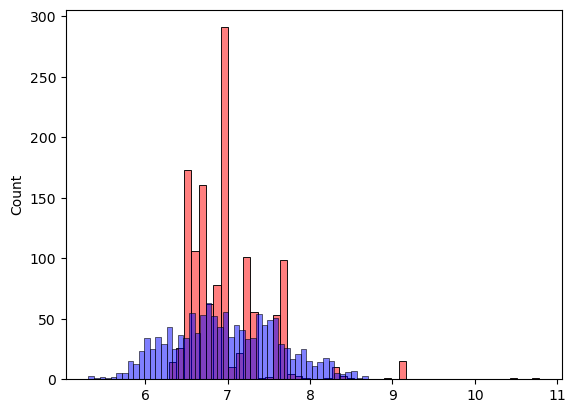

In [111]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [61]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [112]:
score = rmse(y_train, y_pred)
score

0.44632651855038796

In [113]:
round(score, 2)

0.45

In [90]:
screen_mean = df_train.screen.mean()
screen_mean

15.163534416086618

In [91]:
X_train_mean = df_train.fillna(screen_mean).values 

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

In [92]:
w0_mean

6.855566544134296

In [94]:
w_mean

array([ 0.02650252,  0.00066643, -0.04534341])

In [93]:
y_pred_mean

array([7.662716  , 6.36488586, 7.73526545, ..., 6.91345982, 6.98600927,
       6.98600927])

<Axes: ylabel='Count'>

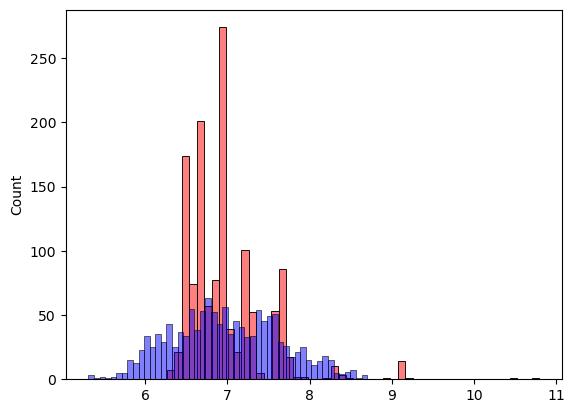

In [95]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [98]:
score_mean = rmse(y_train, y_pred_mean)
score_mean

0.4460856669097624

In [97]:
round(score_mean, 2)

0.45

In [142]:
X_train = df_train.fillna(0).values

In [137]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [143]:
X_val = df_val.fillna(0).values
X_val

array([[  32. , 1000. ,   16. ],
       [  16. ,  512. ,   15.6],
       [  12. ,  512. ,   15.6],
       ...,
       [   8. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ],
       [   4. ,   64. ,   14. ]])

In [119]:
y_val

array([7.86326672, 6.90775528, 6.17019634, 7.32646561, 6.00139013,
       6.74523635, 7.3115924 , 6.72143775, 6.10924758, 8.24794549,
       7.13933514, 7.54960917, 6.78773224, 7.09007684, 6.38181602,
       7.09007684, 5.53101513, 6.89770494, 7.25135208, 6.2146081 ,
       6.12102243, 6.63138235, 7.32711672, 6.34814199, 8.36660051,
       6.03975459, 7.19758504, 7.54960917, 7.54961443, 6.18517929,
       7.64969262, 7.86327057, 6.56667243, 6.23441073, 7.21971524,
       7.74846002, 6.63333159, 7.15807032, 7.54960917, 7.17012724,
       7.10497366, 7.97280734, 6.62007321, 6.29156914, 6.62007321,
       6.49885427, 7.57558978, 8.2160908 , 6.82634998, 7.98989937,
       6.91770561, 6.57786136, 7.31277362, 7.17011954, 6.80461452,
       6.38012254, 7.60579547, 6.7580945 , 7.05875815, 6.70033743,
       7.60090246, 6.24999455, 7.48380669, 6.40867705, 5.81484669,
       7.31322705, 6.64476582, 5.79301361, 6.68461173, 6.27287701,
       6.77992191, 6.25575004, 7.69943472, 6.9445307 , 6.62007

In [144]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 6.727163706112481 0.42886353154744117
0.01 6.721004333260219 0.42885163605341065
0.1 6.666075503828108 0.42877560097076395
1 6.162616499461252 0.43059329897434195
5 4.616086176497313 0.4632095257580717
10 3.5167547207936254 0.5075657769236924
100 0.6849263362660136 0.6735026061725846


In [140]:
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [189]:
all_seed_score_arr = []

In [147]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [148]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [190]:
for seed_val in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    
    np.random.seed(seed_val)
    np.random.shuffle(idx)
    
    df_train = df_subset.iloc[idx[:n_train]]
    df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
    df_test = df_subset.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = df_train.fillna(0).values 
    X_val = df_val.fillna(0).values
    
    w0, w = train_linear_regression(X_train, y_train)
    
    y_pred = w0 + X_val.dot(w)
    
    all_seed_score_arr.append(rmse(y_val, y_pred))

In [191]:
all_seed_score_arr

[565.4520868770995,
 636.7985423056726,
 588.955869790796,
 597.8148920012515,
 571.962791511103,
 573.238325661895,
 647.3438328407194,
 550.4398184485962,
 587.3335036169963,
 576.101792943313]

In [192]:
np.std(all_seed_score_arr)

29.176491258292383

In [184]:
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df_subset.iloc[idx[:n_train]]
df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
df_test = df_subset.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

X_train = df_train.fillna(0).values
X_val = df_val.fillna(0).values
X_test = df_test.fillna(0).values

X_full_training = np.concatenate((X_train, X_val))
y_full_training = np.concatenate((y_train, y_val))


w0, w = train_linear_regression(X_full_training, y_full_training)

y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)

In [185]:
score

608.6102791248064